# Forest Fires

In [1]:
#!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('D:/ExcelR/A16 neural networks/forestfires.csv')

In [3]:
pd.set_option('max_columns', None)

In [4]:
dataset.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
dataset['size_category'].replace({'large':1,'small':0},inplace=True)

In [7]:
dataset.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

<AxesSubplot:xlabel='month', ylabel='count'>

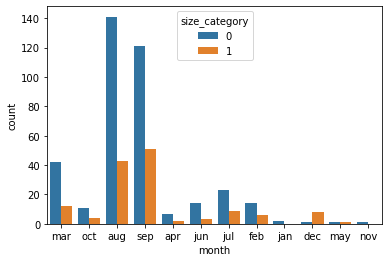

In [11]:
sns.countplot(data=dataset,x='month',hue='size_category')

<AxesSubplot:xlabel='day', ylabel='count'>

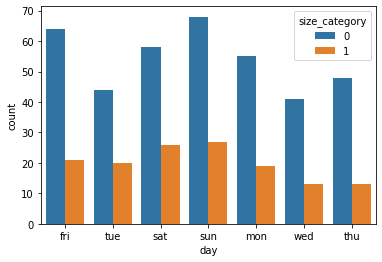

In [12]:
sns.countplot(data=dataset,x='day',hue='size_category')

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

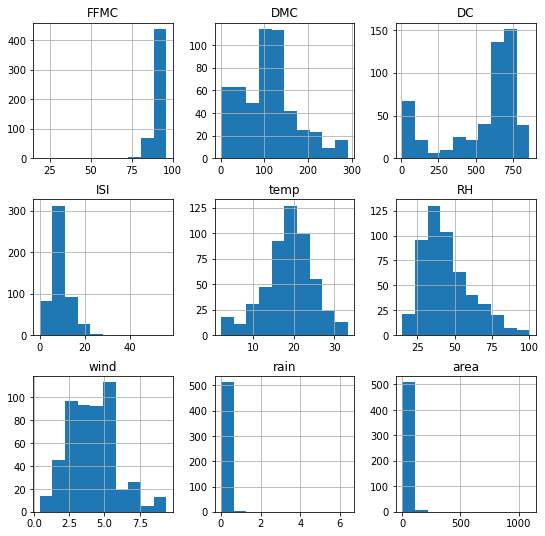

In [13]:
dataset.hist(column=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figsize=(9,9))

In [14]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building and Training ANN

In [17]:
ann = tf.keras.models.Sequential()

In [18]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [19]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
ann.fit(X_train, y_train, batch_size = 30, epochs = 100)

Epoch 1/100
13/13 [==============================] - 2s 8ms/step - loss: 0.6697 - accuracy: 0.6641
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.7054
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.7261
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7364
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7364
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.7364
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7364
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.7364
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.7364
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.7364
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8605
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8605
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8605
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8630
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8630
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8630
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8656
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8682
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8656
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8734
Epoch 93/100


## Testing and Evaluating ANN

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[92  1]
 [15 22]]


0.8769230769230769